# P4 Backpropagation tests

Imports needed for the notebook

In [1]:
from Neuron.Neuron import Neuron
from Neuron.NeuronLayer import NeuronLayer
from Neuron.NeuronNetwerk import NeuronNetwerk

from Neuron.neuronTests import test_neuron_network_results
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import datasets

import pandas
import random
import matplotlib.pyplot as plt
import numpy as np

## Test for the AND-gate

In [ ]:
and_back_propagation = Neuron([-0.5, 0.5], 1.5, "And gate")

and_back_layer = NeuronLayer([and_back_propagation])

and_back_network = NeuronNetwerk([and_back_layer])
and_back_network.train([[1, 1], [1, 0], [0, 1], [0, 0]], [[1], [0], [0], [0]], 1, 1000)
# and_back_network.train([[0, 0]], [[0]], 1, 1)
and_back_results = pandas.DataFrame(
    [
        [0, 0, and_back_network.get_feed_forward_results([0, 0]), test_neuron_network_results(and_back_network, [0, 0], [0])],
        [1, 0, and_back_network.get_feed_forward_results([1, 0]), test_neuron_network_results(and_back_network, [1, 0], [0])],
        [0, 1, and_back_network.get_feed_forward_results([0, 1]), test_neuron_network_results(and_back_network, [0, 1], [0])],
        [1, 1, and_back_network.get_feed_forward_results([1, 1]), test_neuron_network_results(and_back_network, [1, 1], [1])],
    ],
    columns = ['X1', 'X2', 'Result', 'Test']
)
print(f"Het resultaat van de gate is: {(and_back_results['Test'] == True).all()}")
print(and_back_network)
and_back_results

## Test for the XOR-gate

In [ ]:
xor_back_propagations_1 = Neuron([0.2, -0.4], 0, "xor gate")
xor_back_propagations_2 = Neuron([0.7, 0.1], 0, "xor gate")
xor_back_propagations_3 = Neuron([0.6, 0.9], 0, "xor gate")
xor_back_layer_1 = NeuronLayer([xor_back_propagations_1, xor_back_propagations_2])
xor_back_layer_2 = NeuronLayer([xor_back_propagations_3])
xor_back_network = NeuronNetwerk([xor_back_layer_1, xor_back_layer_2])

xor_back_network.train([[1, 1], [1, 0], [0, 1], [0, 0]], [[0], [1], [1], [0]], 1, 1000)
# xor_back_network.train([[1, 1]],[[0]], 1, 1) 
xor_back_results = pandas.DataFrame(
    [
        [0, 0, xor_back_network.get_feed_forward_results([0, 0]), test_neuron_network_results(xor_back_network, [0, 0], [0])],
        [1, 0, xor_back_network.get_feed_forward_results([1, 0]), test_neuron_network_results(xor_back_network, [1, 0], [1])],
        [0, 1, xor_back_network.get_feed_forward_results([0, 1]), test_neuron_network_results(xor_back_network, [0, 1], [1])],
        [1, 1, xor_back_network.get_feed_forward_results([1, 1]), test_neuron_network_results(xor_back_network, [1, 1], [0])],
    ],
    columns = ['X1', 'X2', 'Result', 'Test']
)
print(xor_back_network)

print(f"Het resultaat van de gate is: {(xor_back_results['Test'] == True).all()}")
xor_back_results

## Tests for the half adder
First we create the half adder.

In [ ]:
top_neuron = Neuron([0, 0.1], 0)
mid_neuron = Neuron([0.2, 0.3], 0)
bottom_neuron = Neuron([0.4, 0.5], 0)

carry = Neuron([0.6, 0.7, 0.8], 0)
Sum = Neuron([0.9, 1, 1.1], 0)

haddr_layer_1 = NeuronLayer([top_neuron, mid_neuron, bottom_neuron])
haddr_layer_2 = NeuronLayer([Sum, carry])

haddr = NeuronNetwerk([haddr_layer_1, haddr_layer_2])

Now we can train the half adder and test it.

In [ ]:
haddr.train([[1, 1], [1, 0], [0, 1], [0, 0]],
            [[1, 1], [1, 0], [0, 1], [0, 0]], 0.1, 1000)
        

haddr_results = pandas.DataFrame(
    [
        [1, 1, haddr.get_feed_forward_results([1, 1]), test_neuron_network_results(haddr, [1, 1], [1, 1])],
        [1, 0, haddr.get_feed_forward_results([1, 0]), test_neuron_network_results(haddr, [1, 0], [1, 0])],
        [0, 1, haddr.get_feed_forward_results([0, 1]), test_neuron_network_results(haddr, [0, 1], [0, 1])],
        [0, 0, haddr.get_feed_forward_results([0, 0]), test_neuron_network_results(haddr, [0, 0], [0, 0])],
    ],
    columns = ['X1', 'X2', 'Result', 'Test']
)

print(f"Het resultaat van de gate is: {(haddr_results['Test'] == True).all()}")
haddr_results

## Test voor de iris dataset

Eerst het inladen van de dataset

In [ ]:
iris = load_iris()
iris_data = pandas.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['target'] = pandas.Series(iris.target)

Nu het opzetten van het netwerk met de benodigde neurons en layers.

In [ ]:
input1 = Neuron([random.random() for _ in range(4)], random.random(), eta=0.1)
input2 = Neuron([random.random() for _ in range(4)], random.random(), eta=0.1)
input3 = Neuron([random.random() for _ in range(4)], random.random(), eta=0.1)
input4 = Neuron([random.random() for _ in range(4)], random.random(), eta=0.1)

iris_input_layer = NeuronLayer([input1, input2, input3, input4])

hidden1 = Neuron([random.random() for _ in range(4)], random.random(), eta=0.1)
hidden2 = Neuron([random.random() for _ in range(4)], random.random(), eta=0.1)
hidden3 = Neuron([random.random() for _ in range(4)], random.random(), eta=0.1)

iris_hidden_layer = NeuronLayer([hidden1, hidden2, hidden3])

output1 = Neuron([random.random() for _ in range(3)], random.random(), eta=0.1)
output2 = Neuron([random.random() for _ in range(3)], random.random(), eta=0.1)
output3 = Neuron([random.random() for _ in range(3)], random.random(), eta=0.1)

iris_output_layer = NeuronLayer([output1, output2, output3])

iris_network = NeuronNetwerk([iris_input_layer, iris_hidden_layer, iris_output_layer])

Vervolgens gaan we het netwerk trainen

In [ ]:
iris_data = iris.data.tolist()
iris_target = iris.target.tolist()

possible_outputs = [
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]

targets = [possible_outputs[target] for target in iris_target]

X_train, X_test, y_train, y_test = train_test_split(iris_data, targets, test_size=0.25, random_state=0)

iris_network.train(X_train, y_train)

En uiteindelijk het resultaat weergeven

In [ ]:
iris_results = pandas.DataFrame(
    [[in_p[0], in_p[1], in_p[2], in_p[3], iris_network.get_feed_forward_results(in_p), test_neuron_network_results(iris_network, in_p, out_p)] for in_p, out_p in zip(X_test, y_test)],
    columns = ['X1', 'X2', 'X3', 'X4', 'Result', 'Test']
)

results = iris_results.Test.value_counts()

accuracy = results[1] / sum(results) * 100

print(f"De accuracy van het netwerk is {accuracy.round(2)}% op de testset")

iris_results

## Test voor de digits dataset.

Eerst laden we de dataset in. we checken ook meteen met 1 voorbeeld ui de data of het gelukt is.

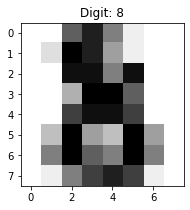

In [2]:
digits = datasets.load_digits()

plt.figure(1, figsize=(3, 3))
# Set title to the first character of the target name
plt.title(f"Digit: {digits.target[-1]}")
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()


Vervolgens zetten we het netwerk op met de benodigde neurons en layers.

In [3]:
random.seed(0)

digit_inputs = [Neuron([random.uniform(-0.1, 0.1) for _ in range(64)], - random.uniform(-0.1, 0.1) * 64/2, eta=0.5) for _ in range(10)]

digit_input_layer = NeuronLayer(digit_inputs)

digit_hidden = [Neuron([random.uniform(-0.1, 0.1) for _ in range(10)], random.uniform(-0.1, 0.1) * 10/2, eta=0.5) for _ in range(16)]

digit_hidden_layer = NeuronLayer(digit_hidden)

digit_output = [Neuron([random.uniform(-0.1, 0.1) for _ in range(16)], random.uniform(-0.1, 0.1) * 16/2, eta=0.5) for _ in range(10)]

digit_output_layer = NeuronLayer(digit_output)

digit_network = NeuronNetwerk([digit_input_layer, digit_hidden_layer, digit_output_layer])

Hier trainen we het netwerk

In [4]:
digit_data = digits.data.tolist()
digit_target = digits.target.tolist()

possible_outputs = [
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
]

targets = [possible_outputs[target] for target in digit_target]

X_train, X_test, y_train, y_test = train_test_split(digit_data, targets, test_size=0.1, random_state=0)

print(X_train[0])
# normalize the data
X_train = np.array(X_train)/16
X_test = np.array(X_test)/16

# digit_network.train(X_train, y_train, max_epochs=100)
digit_network.train(X_train, y_train, max_epochs=100)

[0.0, 0.0, 0.0, 9.0, 11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 15.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.0, 15.0, 1.0, 3.0, 8.0, 0.0, 0.0, 6.0, 16.0, 4.0, 0.0, 14.0, 12.0, 0.0, 0.0, 12.0, 16.0, 4.0, 11.0, 16.0, 5.0, 0.0, 0.0, 9.0, 16.0, 16.0, 16.0, 11.0, 0.0, 0.0, 0.0, 0.0, 6.0, 11.0, 16.0, 7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 16.0, 4.0, 0.0, 0.0]


In [ ]:
digit_network.feed_forward(X_train[2])
digit_network.get_feed_forward_results(X_train[2])
y_train[2]


En hier geven we de resultaten weer van ons netwerk.

In [5]:

digit_results = pandas.DataFrame(
    [[in_p[i] for i in range(64)] + [digit_network.get_feed_forward_results(in_p), test_neuron_network_results(digit_network, in_p, out_p)] for in_p, out_p in zip(X_test, y_test)],
    columns = [f"X{i}" for i in range(64)] + ['Result', 'Test']
)

digit_results

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X56,X57,X58,X59,X60,X61,X62,X63,Result,Test
0,0.0,0.0000,0.6875,1.0000,0.9375,0.1875,0.000,0.000,0.0,0.3125,...,0.0,0.0000,0.8125,0.8125,0.5000,0.8125,1.0000,0.5000,"[8.904522925694514e-09, 0.0011638096362378495,...",True
1,0.0,0.0625,0.9375,0.8750,0.1250,0.0000,0.000,0.000,0.0,0.3750,...,0.0,0.0625,0.9375,1.0000,0.7500,0.0625,0.0000,0.0000,"[9.996276024425082e-05, 0.05292239830596882, 0...",True
2,0.0,0.1250,0.8125,1.0000,0.6250,0.0000,0.000,0.000,0.0,0.7500,...,0.0,0.0625,0.8125,1.0000,1.0000,1.0000,1.0000,0.1875,"[4.219782396790555e-09, 0.0005915302975648614,...",True
3,0.0,0.0000,0.5625,0.4375,0.0000,0.0000,0.000,0.000,0.0,0.0000,...,0.0,0.0000,0.4375,0.8750,1.0000,0.7500,0.0625,0.0000,"[0.02498100249923171, 0.001337127865982886, 0....",True
4,0.0,0.0000,0.1875,0.8125,0.3750,0.0000,0.000,0.000,0.0,0.0000,...,0.0,0.0000,0.1875,0.8125,0.9375,0.5000,0.0000,0.0000,"[0.022106283101023104, 0.00103096033425974, 0....",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.0,0.0000,0.1250,0.9375,0.8125,0.1875,0.000,0.000,0.0,0.0000,...,0.0,0.0000,0.1875,0.7500,0.8750,0.6250,0.0000,0.0000,"[0.03516876182930096, 0.0007872989027524437, 0...",True
176,0.0,0.1250,0.6875,0.8750,0.6250,0.0625,0.000,0.000,0.0,0.3750,...,0.0,0.0625,0.7500,1.0000,1.0000,0.6250,0.0000,0.0000,"[5.307190808974e-07, 1.4501369166955778e-05, 0...",True
177,0.0,0.0000,0.1875,0.7500,0.9375,0.6875,0.125,0.000,0.0,0.0000,...,0.0,0.0000,0.1250,0.8125,1.0000,0.7500,0.0000,0.0000,"[0.00012223589264360213, 0.0034511825504731247...",True
178,0.0,0.0000,0.1250,0.9375,0.9375,0.1875,0.000,0.000,0.0,0.0000,...,0.0,0.0000,0.0625,0.7500,1.0000,1.0000,0.6250,0.0000,"[0.037455186163066014, 0.0008037583446666895, ...",True


Nu laten we het percentage van de accuray zien.


In [6]:

results = digit_results.Test.value_counts()

accuracy = results[1] / sum(results) * 100

print(f"De accuracy van het netwerk is {accuracy.round(2)}% op de testset")

De accuracy van het netwerk is 95.0% op de testset
